In [38]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns

Bivariate Normal Distributions

In [5]:
# Mean and variance matrix for first distribution
mean1 = torch.tensor([-0.5, -0.5])
variance1 = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

# Mean and variance matrix for second distribution
mean2 = torch.tensor([0.5, 0.5])
variance2 = torch.tensor([[1.0, 0.25], [0.25, 1.0]])

#using namespace torch.distributions to generate the bivariate normal distributions
distribution1 = torch.distributions.MultivariateNormal(mean1,variance1)
distribution2 = torch.distributions.MultivariateNormal(mean2,variance2)

#Sampling 1000 points from each of the distributions 
samples1 = distribution1.sample((1000,))
samples2 = distribution2.sample((1000,))

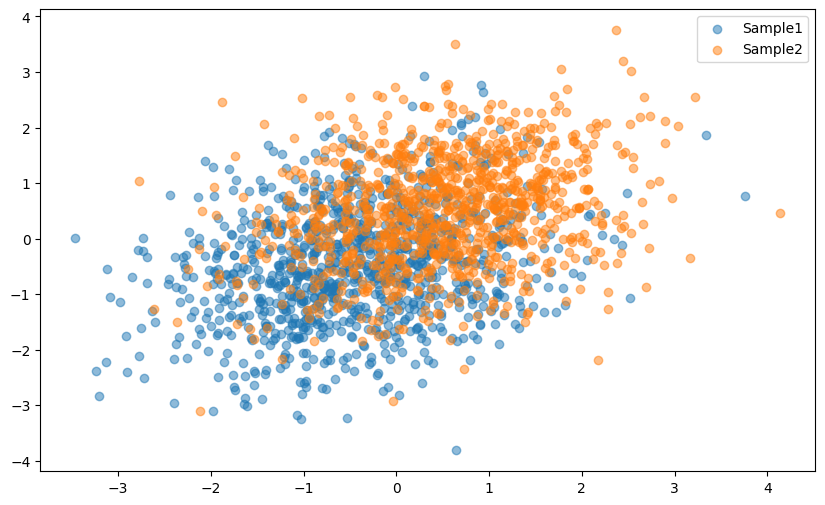

In [6]:
# Plotting the two distributions superimposed
plt.figure(figsize=(10, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], alpha=0.5, label='Sample1')
plt.scatter(samples2[:, 0], samples2[:, 1], alpha=0.5, label='Sample2')
plt.legend()
plt.show()

In [7]:
input_tensor = torch.vstack((samples1, samples2))

In [8]:
input_tensor

tensor([[-0.2256, -0.5753],
        [ 0.8744, -0.8122],
        [-1.4180, -1.5170],
        ...,
        [ 0.0492,  0.4151],
        [ 0.9825,  0.2170],
        [ 0.5319,  0.7806]])

K-means

In [28]:
### K-means clustering function ###

def kmeans(x, k, max_iterations):
    # Randomly initialize centroids 
    input_size = x.shape[0]
    centroids = x[torch.randperm(input_size)[:k]]
    
    for i in range(max_iterations):
        
        #Points assigned to the nearest centroid
        distances = torch.cdist(x,centroids,p=2) #euclidean_distance between each point and every centroid
        cluster_assignments = torch.argmin(distances, dim=1) #min of the distances for each point
        
        #Updating the centroids based on the mean of all points in a particular cluster
        new_centroids = torch.empty((k, x.shape[1]))  
        for j in range(k):
            cluster_points = x[cluster_assignments == j]
            new_centroids[j] = cluster_points.mean(dim=0)
        
        # If new_centroids are the same as the in the previous iteration, we stop the loop
        if torch.all(centroids == new_centroids):
            break
        
        centroids = new_centroids

    return centroids


k = 3 # Number of clusters
centroids  = kmeans(input_tensor, k, 100)

# Output the final centroids and some sample cluster assignments
print(f"Centroids computed by Kmeans:\n{centroids}")


Centroids computed by Kmeans:
tensor([[ 1.2345,  0.8041],
        [-0.8003, -1.2327],
        [-0.3149,  0.3848]])


PCA 

In [39]:
#Synthesizing the input 
X = torch.normal(0, 1, (100, 2))

X = torch.cat([
    X,
    3 * X[:, 0:1] - 2 * X[:, 1:2] + torch.normal(0, 0.1, (100, 2))[:, 0:1],  
    1.5 * X[:, 0:1] - 0.5 * X[:, 1:2] + torch.normal(0, 0.1, (100, 2))[:, 1:2]   
], dim=1)


In [40]:
print(X[:5])
print(X.shape)

tensor([[-0.7443, -0.0358, -2.1868, -1.1147],
        [ 0.2887,  0.2887,  0.3145,  0.2803],
        [-1.6471, -0.3973, -4.1800, -2.2121],
        [-2.0959,  1.6244, -9.5311, -3.9708],
        [ 0.2420, -1.6897,  4.2308,  1.2578]])
torch.Size([100, 4])


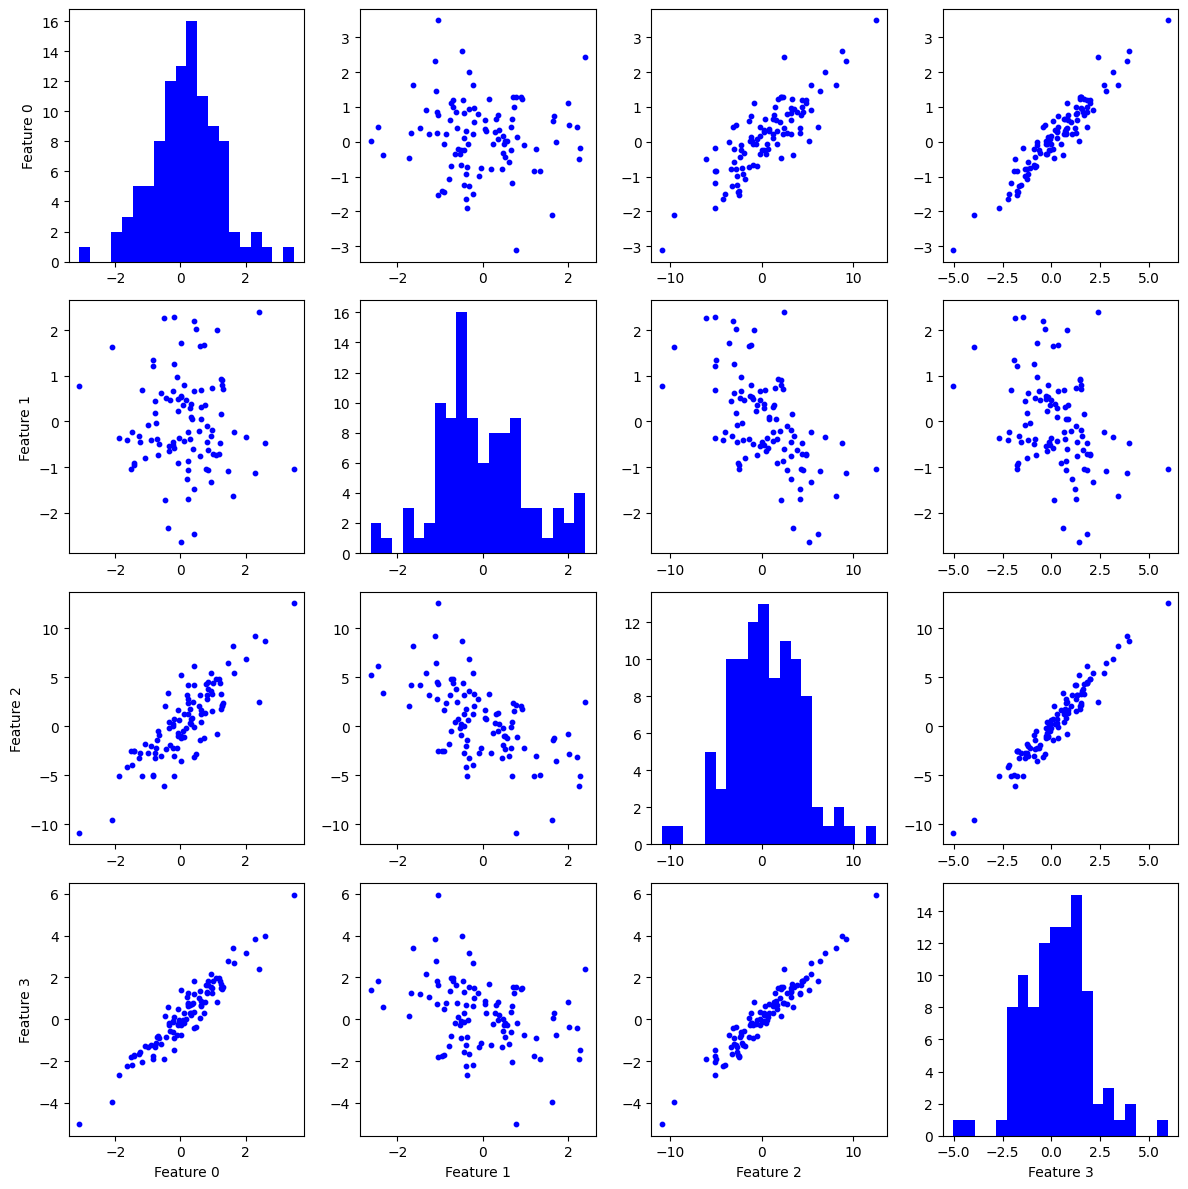

In [43]:
#Visualizing correlation between features

num_features = X.shape[1]

fig, axes = plt.subplots(num_features, num_features, figsize=(12, 12))

for i in range(num_features):
    for j in range(num_features):
        if i == j:
            axes[i, j].hist(X[:, i].numpy(), bins=20, color='blue')
        else:
            axes[i, j].scatter(X[:, j].numpy(), X[:, i].numpy(), s=10, color='blue')
        
        if i == num_features - 1:
            axes[i, j].set_xlabel(f'Feature {j}')
        if j == 0:
            axes[i, j].set_ylabel(f'Feature {i}')

plt.tight_layout()
plt.show()

In [47]:
#Number of PCA components 
num_components = 2

#Covariance matrix
cov_matrix = cov_matrix = sum([X[i].reshape(-1, 1) @ X[i].reshape(1, -1) for i in range(X.size(0))])  / (X.size(0))

#Eigenvalues and Eigenvectors of the covariance matrix
eigenvalues, eigenvectors = torch.linalg.eig(cov_matrix)

#Keeping real part of eigenvalues and eigenvectors
eigenvalues = eigenvalues.real
eigenvectors = eigenvectors.real

#Sorting eigenvectors by eigenvalues in decreasing order
sorted_indices = torch.argsort(eigenvalues, descending=True)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

selected_eigenvectors = sorted_eigenvectors[:, :num_components]

print("Principal Components:\n", selected_eigenvectors)

Principal Components:
 tensor([[ 0.2110, -0.4846],
        [-0.1298, -0.7944],
        [ 0.8914,  0.1425],
        [ 0.3795, -0.3373]])
